In [74]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
BASE_PATH = "D:\dev\PROJECTS\ECG-Analysis-SP2\\results\\"

In [76]:
df = pd.read_csv(f"{BASE_PATH}ecg.csv")
df.head()

,Name,Age,Gender,Mean_RR,STD_RR,RMS_RR,Mean_HR,STD_HR,RMSSD,Status
0,Vardhaman,23,M,855.719153,57.218808,857.630025,70.116463,4.555713,42.993773,0
1,Vincet,27,M,752.645039,71.467749,756.030551,79.718854,9.007666,31.065595,0
2,Ramesh,30,M,660.651590,16.939869,660.868733,90.819429,2.274697,9.424568,0
3,Pulak Paul,36,M,736.175919,54.695467,738.204970,81.502258,6.749843,25.330474,0
4,SAURABH SINGH,31,M,847.817407,137.759364,858.936550,70.769955,13.943722,43.589890,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     130 non-null    object 
 1   Age      130 non-null    int64  
 2   Gender   130 non-null    object 
 3   Mean_RR  130 non-null    float64
 4   STD_RR   130 non-null    float64
 5   RMS_RR   130 non-null    float64
 6   Mean_HR  130 non-null    float64
 7   STD_HR   130 non-null    float64
 8   RMSSD    130 non-null    float64
 9   Status   130 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 10.3+ KB


In [78]:
df.shape

(130, 10)

In [79]:
df.isnull().sum()

Name       0
Age        0
Gender     0
Mean_RR    0
STD_RR     0
RMS_RR     0
Mean_HR    0
STD_HR     0
RMSSD      0
Status     0
dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the "Senior Management" 
# column with LabelEncoder
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Name,Age,Gender,Mean_RR,STD_RR,RMS_RR,Mean_HR,STD_HR,RMSSD,Status
0,Vardhaman,23,1,855.719153,57.218808,857.630025,70.116463,4.555713,42.993773,0
1,Vincet,27,1,752.645039,71.467749,756.030551,79.718854,9.007666,31.065595,0
2,Ramesh,30,1,660.651590,16.939869,660.868733,90.819429,2.274697,9.424568,0
3,Pulak Paul,36,1,736.175919,54.695467,738.204970,81.502258,6.749843,25.330474,0
4,SAURABH SINGH,31,1,847.817407,137.759364,858.936550,70.769955,13.943722,43.589890,0


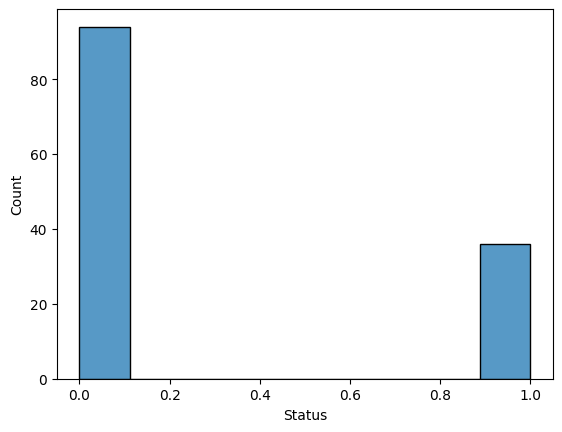

In [81]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='Status', data=df, )
plt.show()

Skewness: 1.0087170881216265
Kurtosis: -0.9980853768777567




C:\Users\Pavan\AppData\Local\Temp\ipykernel_14516\1362203378.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Status'])


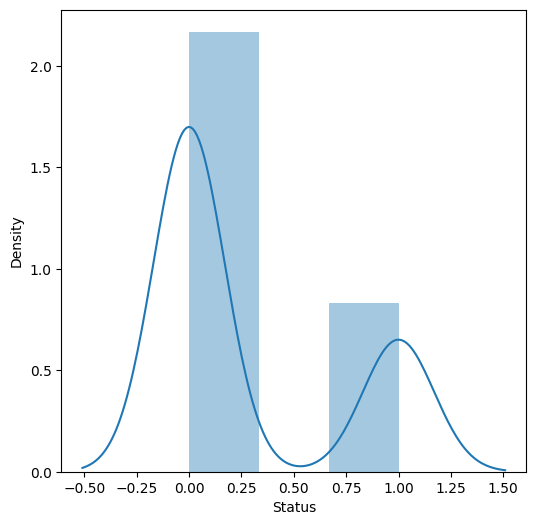

In [82]:
print(f"Skewness: {df['Status'].skew()}\nKurtosis: {df['Status'].kurt()}\n\n")

plt.figure(figsize=[6,6])
sns.distplot(df['Status'])
plt.show()

In [144]:
X = df.drop(['Name', 'Age', 'Gender', 'Status'], axis=1).copy()
y = df['Status'].copy()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

In [147]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, \
    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, \
    1, 2, 3, 4, 5, 6, 7, 8, 9, \
    10, 20, 50, 100, 500, 1000]
}

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
rfc = RandomForestClassifier()
rdgCV = GridSearchCV(estimator=rfc, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1)
rdgCV.fit(X_train, y_train)

In [157]:


clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

In [155]:
y_test = np.array(y_test)
y_test

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [159]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")

Accuracy: 0.7692307692307693


In [160]:
confusion_matrix(y_test, y_pred_test)

array([[25,  0],
       [ 9,  5]], dtype=int64)

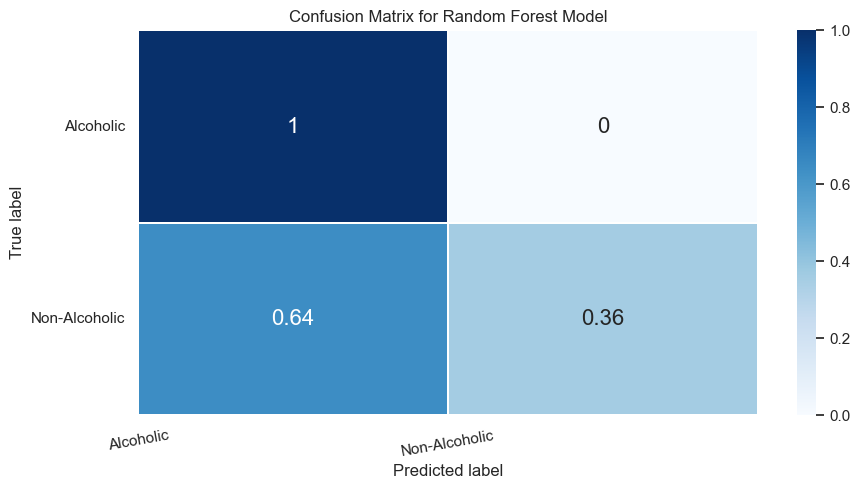

In [167]:
confusion_matrix(y_test, y_pred_test)
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':16},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Alcoholic', 'Non-Alcoholic']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=10)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()